<a href="https://colab.research.google.com/github/Nihal-18/ML/blob/master/EXP_9/Exp_9_(_1_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: NIHAL M TODANKAR

ROLL NO: J058

TOPIC: Activity recognition with healthy older people using a batteryless wearable sensor

NO.: 11

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import glob
import os

In [19]:
s1= '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset'

In [20]:
path1= r'/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset'

all_files1= glob.glob(path1+'/*')
print(all_files1)

['/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p02M', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p01M', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p05M', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p03M', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p04M', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p06M', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p09F', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p08F', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p10F', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p07M', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p14F', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p11F', '/content/drive/My Drive/Datasets_Healthy_Older_People/S1_Dataset/d1p12F', '/content/drive/My Drive

In [21]:
li1=[]
for file in all_files1:
    #print(file)
    if file.endswith('.txt'):
        continue
    df=pd.read_csv(file,header=None,index_col=None)
    li1.append(df)
df1=pd.concat(li,axis=0,ignore_index=True)

In [22]:
df1

,0,1,2,3,4,5,6,7,8
0,0.00,-0.044557,0.93932,0.111750,1,-58.0,0.17794,920.75,4
1,0.25,-0.044557,0.93932,0.111750,1,-60.0,0.46940,920.25,4
2,0.75,-0.044557,0.93932,0.111750,3,-68.5,0.15033,923.25,1
3,1.50,-0.044557,0.93932,0.111750,4,-57.5,5.10820,925.75,1
4,2.50,0.612070,0.89339,0.009122,4,-57.5,4.39490,920.75,1
...,...,...,...,...,...,...,...,...,...
52477,485.00,0.330660,0.95081,-0.230340,1,-57.0,6.21880,921.75,1
52478,485.08,0.330660,0.95081,-0.230340,3,-58.0,0.88050,921.75,1
52479,485.50,0.330660,0.95081,-0.230340,1,-60.5,5.00540,924.75,1
52480,488.25,0.119600,0.82449,0.009122,4,-56.0,4.90870,925.75,4


In [23]:
df1.columns=['Time','Acc. Front','Acc. vert','Acc. Lat','id','RSSI','Phase','Freq','Activity Label']
df1.head()

,Time,Acc. Front,Acc. vert,Acc. Lat,id,RSSI,Phase,Freq,Activity Label
0,0.00,-0.044557,0.93932,0.111750,1,-58.0,0.17794,920.75,4
1,0.25,-0.044557,0.93932,0.111750,1,-60.0,0.46940,920.25,4
2,0.75,-0.044557,0.93932,0.111750,3,-68.5,0.15033,923.25,1
3,1.50,-0.044557,0.93932,0.111750,4,-57.5,5.10820,925.75,1
4,2.50,0.612070,0.89339,0.009122,4,-57.5,4.39490,920.75,1


In [24]:
df1.isna().sum()

Time              0
Acc. Front        0
Acc. vert         0
Acc. Lat          0
id                0
RSSI              0
Phase             0
Freq              0
Activity Label    0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       724 non-null    float64
 1   1       724 non-null    float64
 2   2       724 non-null    float64
 3   3       724 non-null    float64
 4   4       724 non-null    int64  
 5   5       724 non-null    float64
 6   6       724 non-null    float64
 7   7       724 non-null    float64
 8   8       724 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 51.0 KB


In [26]:
y= df1['Activity Label']

In [29]:
X= df1.drop(columns= ['id', 'Activity Label', 'Time'])

In [30]:
X

,Acc. Front,Acc. vert,Acc. Lat,RSSI,Phase,Freq
0,-0.044557,0.93932,0.111750,-58.0,0.17794,920.75
1,-0.044557,0.93932,0.111750,-60.0,0.46940,920.25
2,-0.044557,0.93932,0.111750,-68.5,0.15033,923.25
3,-0.044557,0.93932,0.111750,-57.5,5.10820,925.75
4,0.612070,0.89339,0.009122,-57.5,4.39490,920.75
...,...,...,...,...,...,...
52477,0.330660,0.95081,-0.230340,-57.0,6.21880,921.75
52478,0.330660,0.95081,-0.230340,-58.0,0.88050,921.75
52479,0.330660,0.95081,-0.230340,-60.5,5.00540,924.75
52480,0.119600,0.82449,0.009122,-56.0,4.90870,925.75


In [31]:
X.shape

(52482, 6)

In [32]:
y.shape

(52482,)

In [33]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

In [36]:
X= sc.fit_transform(X)

In [37]:
X

array([[-2.14351269,  1.19753155,  0.57584866,  0.09342831, -1.38282314,
        -1.18804872],
       [-2.14351269,  1.19753155,  0.57584866, -0.34030053, -1.25272566,
        -1.48325111],
       [-2.14351269,  1.19753155,  0.57584866, -2.18364813, -1.39514727,
         0.28796323],
       ...,
       [-1.19685166,  1.22203599, -1.31758289, -0.44873275,  0.77198499,
         1.17357041],
       [-1.72934959,  0.95263647,  0.00781587,  0.52715716,  0.72882151,
         1.76397519],
       [-1.84768191,  2.00577277,  0.00781587,  0.41872494, -0.99936901,
        -0.00723916]])

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 9)

In [73]:
print('X_train Shape= ',X_train.shape)
print('X_test Shape= ',X_test.shape)
print('Y_train Shape= ',y_train.shape)
print('Y_test Shape= ',y_test.shape)

X_train Shape=  (41985, 6)
X_test Shape=  (10497, 6)
Y_train Shape=  (41985,)
Y_test Shape=  (10497,)


In [74]:
y_tr= y_train

t_te= y_test

In [75]:
from keras import models
from keras import layers

from keras.utils import to_categorical

In [76]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [77]:
print('Y_train Shape= ',y_train.shape)
print('Y_test Shape= ',y_test.shape)

Y_train Shape=  (41985, 5)
Y_test Shape=  (10497, 5)


In [66]:
nn= models.Sequential()

nn.add(layers.Dense(256, activation= 'tanh', input_dim= 6))
nn.add(layers.Dense(128, activation= 'relu'))
nn.add(layers.Dense(64, activation= 'relu'))
nn.add(layers.Dense(5, activation= 'softmax'))

nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               1792      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 325       
Total params: 43,269
Trainable params: 43,269
Non-trainable params: 0
_________________________________________________________________


In [67]:
nn.compile(optimizer= 'adam', loss= ['categorical_crossentropy'], metrics= ['accuracy'])

In [68]:
hist= nn.fit(X_train, y_train, epochs= 50, validation_split= 0.2)

Epoch 1/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2478 - accuracy: 0.9103 - val_loss: 0.1945 - val_accuracy: 0.9295
Epoch 2/50
1050/1050 [==============================] - 2s 1ms/step - loss: 0.2067 - accuracy: 0.9221 - val_loss: 0.1886 - val_accuracy: 0.9324
Epoch 3/50
1050/1050 [==============================] - 2s 1ms/step - loss: 0.1964 - accuracy: 0.9266 - val_loss: 0.1752 - val_accuracy: 0.9365
Epoch 4/50
1050/1050 [==============================] - 2s 1ms/step - loss: 0.1882 - accuracy: 0.9302 - val_loss: 0.1838 - val_accuracy: 0.9307
Epoch 5/50
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1852 - accuracy: 0.9309 - val_loss: 0.1720 - val_accuracy: 0.9345
Epoch 6/50
1050/1050 [==============================] - 2s 1ms/step - loss: 0.1793 - accuracy: 0.9341 - val_loss: 0.1743 - val_accuracy: 0.9335
Epoch 7/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1752 - accuracy: 0.9357 - val_loss: 0.1758 - val_accuracy:

In [69]:
nn.evaluate(X_test, y_test)

329/329 [==============================] - 0s 791us/step - loss: 0.1384 - accuracy: 0.9566


[0.1383989453315735, 0.9565590023994446]

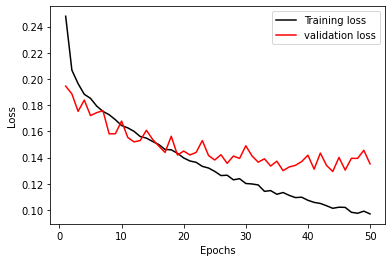

In [70]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,51)

plt.plot(epochs, loss_train, 'k', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

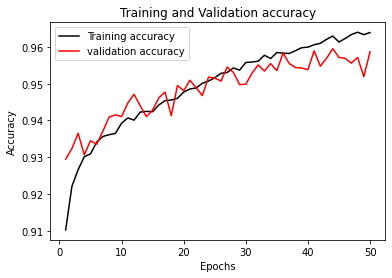

In [71]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']

epochs = range(1,51)

plt.plot(epochs, loss_train, 'k', label='Training accuracy')
plt.plot(epochs, loss_val, 'r', label='validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
# Going for KNN
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

In [80]:
knn.fit(X_train,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [83]:
y_pred_knn=knn.predict(X_test)
print("accuracy KNN= ",accuracy_score(t_te,y_pred_knn))

accuracy KNN=  0.9619891397542155


In [ ]:
# Going for SVM


In [84]:
from sklearn.svm import SVC

In [85]:
SVCClf = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)

SVCClf.fit(X_train, y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=False,
    tol=0.001, verbose=False)

In [86]:
y_preds= SVCClf.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy : ', accuracy_score(t_te, y_preds))

Accuracy :  0.8931123178050872
